In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

save_path = "./data/01_test_inversion_LayeredModel/AD"

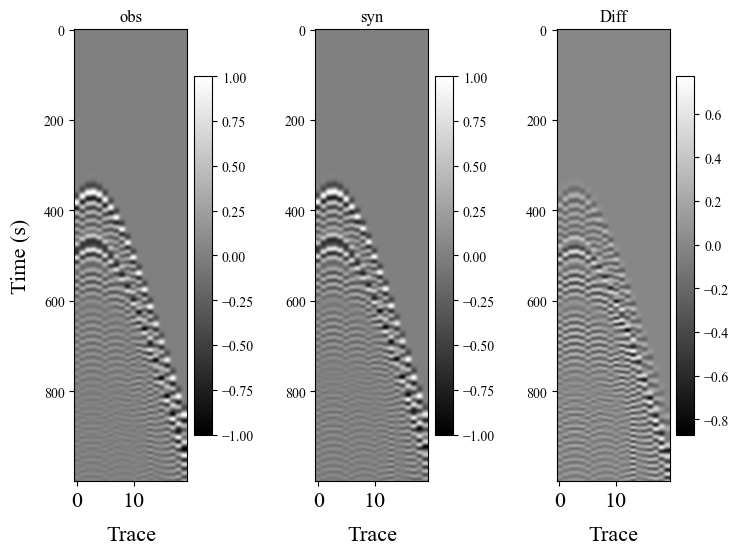

In [2]:
syn_data = np.load(os.path.join(save_path,"syn/syn.npz"))["obs_data"]
obs_data = np.load(os.path.join(save_path,"obs/obs.npz"))["obs_data"]
shot = 1
d_obs = obs_data[shot]
d_syn = syn_data[shot]

# Plot seismology
nx  = d_obs.shape[1]
nt  = d_obs.shape[0]

fontsize = 16
plt.rc('font', family='Times New Roman')

plt.figure(figsize=(8,15))
plt.subplot(131)
plt.imshow(d_obs, cmap='gray',  aspect=.08)
plt.colorbar(fraction=0.13,pad = 0.05)
plt.title("obs")

plt.xlabel('Trace',    labelpad=10, fontsize=fontsize)
plt.ylabel('Time (s)', labelpad=10, fontsize=fontsize)
plt.xticks( fontsize=fontsize)
# plt.yticks(np.arange(0,  2000, 1000), np.arange(0, 4, 2), fontsize=fontsize)

plt.subplot(132)
plt.imshow(d_syn, cmap='gray',  aspect=.08)
plt.colorbar(fraction=0.13,pad = 0.05)
plt.title("syn")
plt.xlabel('Trace',    labelpad=10, fontsize=fontsize)
# plt.ylabel('Time (s)', labelpad=10, fontsize=fontsize)
plt.xticks( fontsize=fontsize)
# plt.yticks(np.arange(0,  2000, 1000), np.arange(0, 4, 2), fontsize=fontsize)

plt.subplot(133)
plt.imshow(d_obs - d_syn, cmap='gray', aspect=.08)
plt.colorbar(fraction=0.13,pad = 0.05)
plt.title("Diff")
plt.xlabel('Trace',    labelpad=10, fontsize=fontsize)
# plt.ylabel('Time (s)', labelpad=10, fontsize=fontsize)
plt.xticks( fontsize=fontsize)

plt.subplots_adjust(wspace=0.75)
plt.show()

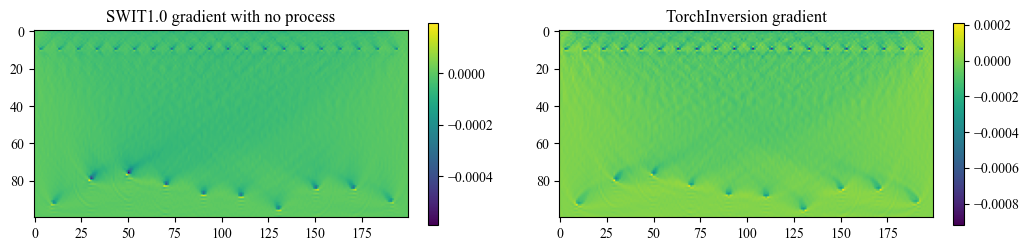

In [7]:
# 梯度对比
grads_swit_proper = np.loadtxt("./data/01_test_inversion_LayeredModel/SWIT/Gradient/grad_proper.dat").T
grads_swit_buproper = np.loadtxt("./data/01_test_inversion_LayeredModel/SWIT/Gradient/grad_boproper.dat").T
grads_AD = np.loadtxt("./data/01_test_inversion_LayeredModel/AD/grad/grad.txt")

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(grads_swit_buproper)
plt.colorbar(fraction=0.025,pad = 0.05)
plt.title("SWIT1.0 gradient with no process")

plt.subplot(122)
plt.imshow(-grads_AD/2)
plt.colorbar(fraction=0.025,pad = 0.05)
plt.title("TorchInversion gradient")

# plt.subplot(133)
# plt.imshow(shot_matrix - shot_single)
# plt.colorbar(fraction=0.045,pad = 0.05)

plt.subplots_adjust(wspace=0.3)
plt.show()

In [10]:
(-grads_AD).min()/2

-0.0009192771613015793

In [11]:
grads_swit_buproper.min()

-0.0005875509232282639